In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Getting Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Getting helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['artifact', 'extended object']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

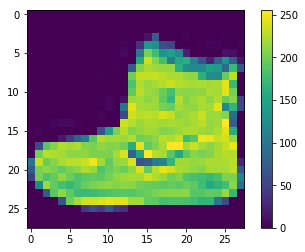

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

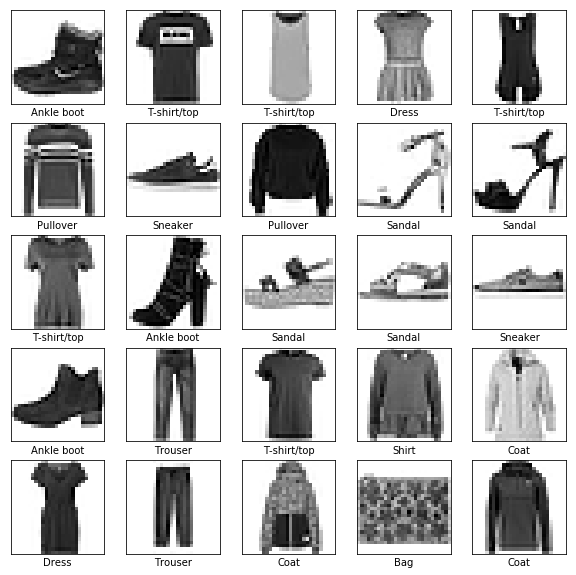

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 1.1013 - acc: 0.6482
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6434 - acc: 0.7682
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5694 - acc: 0.7948
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5281 - acc: 0.8130
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5008 - acc: 0.8242


In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.5143 - acc: 0.8137
Test accuracy: 0.8137


In [0]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([1.7277343e-06, 7.8949924e-08, 8.0836508e-06, 8.7858734e-06,
       2.3066488e-05, 1.2037676e-01, 3.1571297e-05, 3.3945584e-01,
       5.9136944e-03, 5.3418034e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                                  100*np.max(predictions_array),
                                                  class_names[true_label]),
                                                  color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

    
    
    

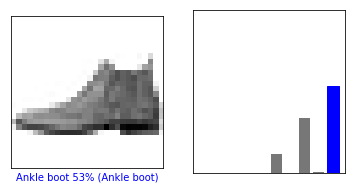

In [64]:
i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

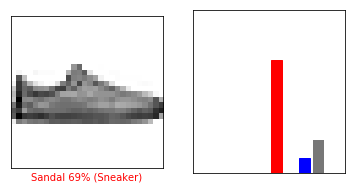

In [66]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

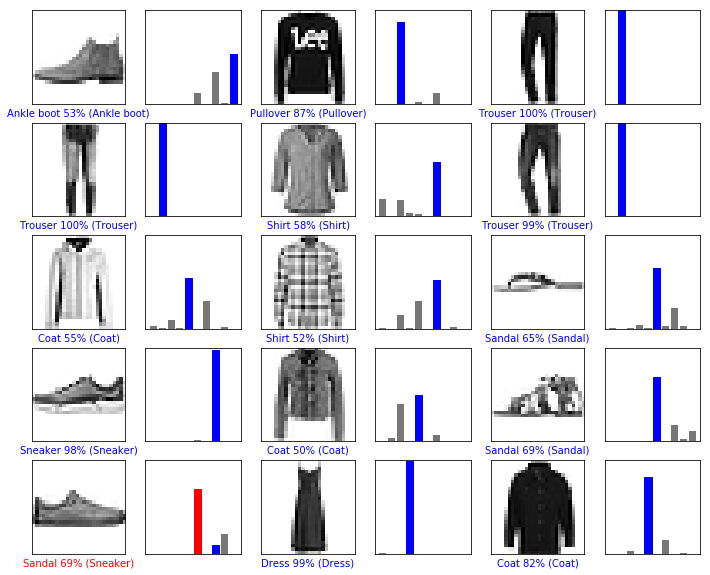

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [71]:
img = test_images[0]

print(img.shape)

(28, 28)


In [72]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [73]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.7277365e-06 7.8949640e-08 8.0836608e-06 8.7858834e-06 2.3066537e-05
  1.2037689e-01 3.1571337e-05 3.3945557e-01 5.9136981e-03 5.3418046e-01]]


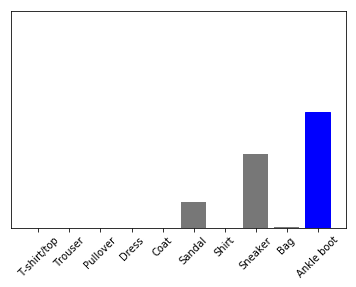

In [74]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [76]:
prediction_result = np.argmax(predictions_single[0])

print(prediction_result)

9
